In [ ]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataDirList = ['archive/GarbageClassification']

selectedClasses = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

In [ ]:
imgPaths = []
labels = []
for dataDir in dataDirList:
    for className in os.listdir(dataDir):
        if className in selectedClasses :
            classPath = os.path.join(dataDir,className)
            for img in os.listdir(classPath):
                imgPath = os.path.join(classPath,img)
                imgPaths.append(imgPath)
                labels.append(className)

# Convert the 2 lists to dataframe to easy use
df = pd.DataFrame({
    'imgPath':imgPaths,
    'label':labels
})

df = df.sample(frac=1).reset_index(drop=True)            # Shuffle

df

,imgPath,label
0,archive/GarbageClassification\paper\paper441.jpg,paper
1,archive/GarbageClassification\paper\paper250.jpg,paper
2,archive/GarbageClassification\glass\glass497.jpg,glass
3,archive/GarbageClassification\glass\glass215.jpg,glass
4,archive/GarbageClassification\glass\glass300.jpg,glass
...,...,...
2522,archive/GarbageClassification\plastic\plastic95.jpg,plastic
2523,archive/GarbageClassification\paper\paper317.jpg,paper
2524,archive/GarbageClassification\glass\glass285.jpg,glass
2525,archive/GarbageClassification\cardboard\cardboard221.jpg,cardboard


In [ ]:
df['label'].value_counts()

label
paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: count, dtype: int64

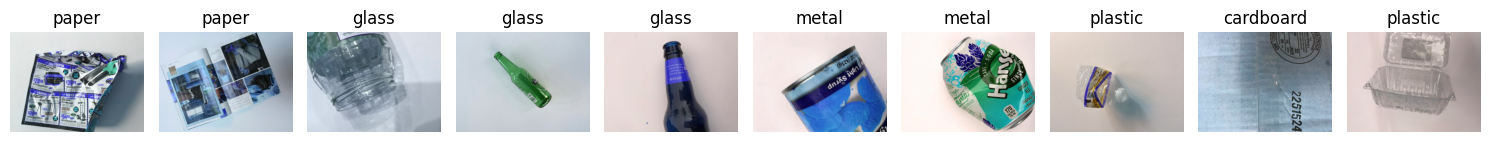

In [ ]:
def plot_images_from_df(df, num_images=3):
    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through the number of images you want to display
    for i in range(num_images):
        # Read the image from the path
        image_path = df.iloc[i]['imgPath']
        label = df.iloc[i]['label']

        # Load image using OpenCV and convert from BGR to RGB for matplotlib
        image = cv2.imread(image_path)
        # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Plot the image on the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(label)  # Set the title as the label
        axes[i].axis('off')       # Hide axis for a cleaner look

    plt.tight_layout()
    plt.show()

# Call the function to plot images
plot_images_from_df(df, num_images=10)  # Specify the number of images to plot

In [ ]:
df_gaussian_blur = df.copy()

In [ ]:
# Function to apply Gaussian blur and update DataFrame with new image paths
def apply_gaussian_blur_to_paths(df, save_path):
    for idx, row in df.iterrows():
        # Read the original image
        image_path = row['imgPath']
        image = cv2.imread(image_path)

        # Apply Gaussian Blur
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

        # Save the blurred image to a new file
        filename = os.path.basename(image_path)
        blurred_image_path = os.path.join(save_path, f"blurred_{filename}")
        cv2.imwrite(blurred_image_path, blurred_image)

        # Update the DataFrame with the new image path
        df.at[idx, 'imgPath'] = blurred_image_path

# Example: Update DataFrame with blurred images saved to a new folder
apply_gaussian_blur_to_paths(df_gaussian_blur, save_path='Gaussian_Blured')  # Replace with your save path

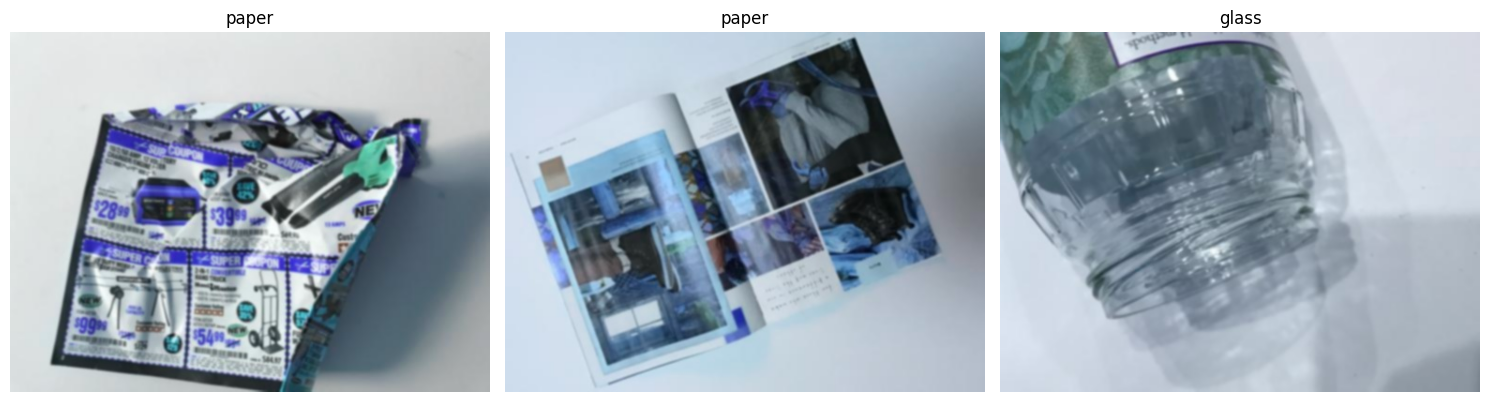

In [ ]:
plot_images_from_df(df_gaussian_blur,3)

In [ ]:
df_edges = df_gaussian_blur.copy()

In [ ]:
# Function to apply Edge Detection and update DataFrame with new image paths
def apply_edge_detection_to_paths(df, save_path):
    for idx, row in df.iterrows():
        # Read the original image
        image_path = row['imgPath']
        image = cv2.imread(image_path)

        # Apply Gaussian Blur
        edges = cv2.Canny(image, 100, 200)

        # Save the blurred image to a new file
        filename = os.path.basename(image_path)
        edges_image_path = os.path.join(save_path, f"edges_{filename}")
        cv2.imwrite(edges_image_path, edges)

        # Update the DataFrame with the new image path
        df.at[idx, 'imgPath'] = edges_image_path

# Example: Update DataFrame with blurred images saved to a new folder
apply_edge_detection_to_paths(df_edges, save_path='edges')  # Replace with your save path

In [ ]:
df_edges.head()

,imgPath,label
0,edges\edges_edges_blurred_paper157.jpg,paper
1,edges\edges_edges_blurred_plastic410.jpg,plastic
2,edges\edges_edges_blurred_plastic208.jpg,plastic
3,edges\edges_edges_blurred_cardboard200.jpg,cardboard
4,edges\edges_edges_blurred_glass13.jpg,glass


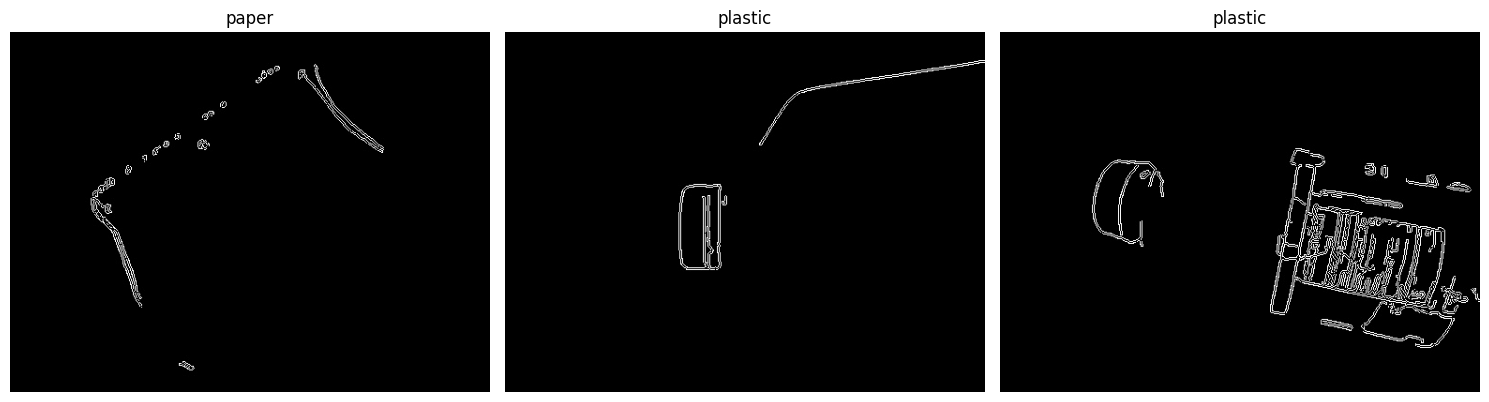

In [ ]:
plot_images_from_df(df_edges,3)

In [ ]:
df.to_csv("Original.csv")
df_gaussian_blur.to_csv("Gaussian.csv")
df_edges.to_csv("Edges.csv")